In [1]:
# Parameters
DatasetID = "DS000017114"
DEV = False
test_DatasetID = ""
DS_test = False
title = "Recursion DLD1 Library1 Screen Day 5- combination of NGS 5774 and NGS 5702"
description = "Production scale screen in DLD-1 cells with 1/4 of the genome-wide CRISPR library (sub-lib-1, ~22K guides). 1 time point: Day-5. We performed 24 rxns of 10x 3' HT kit with an estimated loading of 52K cells. We performed a pilot study to test the library quality before the production-level sequencing. We will submit 72 libraries (24 GEX, 24 HTO and 24 sgRNA) We estimate need 600M for GEX, 30M for HTO and 50M for sgRNA. This is a repeat run to correct chip loading."
name_space = [{"id": "GRCh38", "type": "genome"}]
sources = [{"id": "Siavash-1234", "name": "Geo-ID"}]
tech_name = "scRNA-seq"
author = "SG"
organism = "human"
embeddings_key = "X_scVI"
transcriptoprint = False
MV_file = "/gstore/project/crc_recursion_gw/DLD1_Sublib1_bdev//DS000017114/Energy_Distance/e_dist_all.h5ad"
path = "/gstore/project/crc_recursion_gw/DLD1_Sublib1_bdev//DS000017114/Energy_Distance"


In [2]:
import sys
sys.path.append("..")
import Templates.tools.multivariate as mv
import seaborn as sns
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/apps/user/gpy/envs/dev/GPUy310pascal/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/apps/user/gpy/envs/dev/GPUy310pascal/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


In [3]:
adata = sc.read_h5ad(MV_file)

In [4]:
adata

AnnData object with n_obs × n_vars = 595603 × 36603
    obs: 'Sample', 'Barcode', 'DemuxType_crispr', 'DemuxAssignment_crispr', 'DemuxType_hashing', 'DemuxAssignment_hashing', 'cellline', 'timepoint', 'HTO', 'NGS_ID', 'Biological_replicate', '10Xrun', 'sublibrary', 'gRNA_library_MOI', 'gene_symbol', 'class', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'qc_pass', 'S_score', 'G2M_score', 'phase', 'SCN_class', 'gem'
    var: 'Symbol'
    uns: 'DemuxAssignment_hashing_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'energy_distance', 'leiden_colors', 'multivariate_report', 'neighbors', 'perturbation_embeddings', 'perturbations', 'umap'
    obsm: 'X_pca', 'X_pca_centered', 'X_pca_sphered', 'X_pca_sphered_Norm', 'X_scVI', 'X_scVI_centered', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [5]:
key_uns = embeddings_key.split("_",1)[-1]

In [6]:
if key_uns in ["pca_sphered","pca_sphered_Norm"]:
    centering = False
else:
    centering = True

In [7]:
if transcriptoprint:
    A = list(mv.common_genes(key_uns, path))
    A.append("NTC")
    bdata = adata[adata.obs["gene_symbol"].isin(A)].copy()
else:
    bdata = adata.copy()

In [8]:
bdata

AnnData object with n_obs × n_vars = 595603 × 36603
    obs: 'Sample', 'Barcode', 'DemuxType_crispr', 'DemuxAssignment_crispr', 'DemuxType_hashing', 'DemuxAssignment_hashing', 'cellline', 'timepoint', 'HTO', 'NGS_ID', 'Biological_replicate', '10Xrun', 'sublibrary', 'gRNA_library_MOI', 'gene_symbol', 'class', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'qc_pass', 'S_score', 'G2M_score', 'phase', 'SCN_class', 'gem'
    var: 'Symbol'
    uns: 'DemuxAssignment_hashing_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'energy_distance', 'leiden_colors', 'multivariate_report', 'neighbors', 'perturbation_embeddings', 'perturbations', 'umap'
    obsm: 'X_pca', 'X_pca_centered', 'X_pca_sphered', 'X_pca_sphered_Norm', 'X_scVI', 'X_scVI_centered', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [9]:
bdata.obs

,Sample,Barcode,DemuxType_crispr,DemuxAssignment_crispr,DemuxType_hashing,DemuxAssignment_hashing,cellline,timepoint,HTO,NGS_ID,...,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,qc_pass,S_score,G2M_score,phase,SCN_class,gem
SAM24451293_rep1-AAACCCAAGAAATCCA,SAM24451293,AAACCCAAGAAATCCA,singlet,ENSG00000154124_2,singlet,SAM24439044,DLD1,day5,HTO-14,NGS5774,...,534,3.448721,3024,19.529837,True,-0.734884,-0.491440,G1,Untreatedclus_DLD1,NGS5774-1
SAM24451293_rep1-AAACCCAAGACAGTCG,SAM24451293,AAACCCAAGACAGTCG,singlet,ENSG00000171017_3,singlet,SAM24439045,DLD1,day5,HTO-18,NGS5774,...,618,6.336512,2152,22.065006,True,-0.493023,0.231481,G2M,Untreatedclus_DLD1,NGS5774-1
SAM24451293_rep1-AAACCCACAGACCCGT,SAM24451293,AAACCCACAGACCCGT,singlet,ENSG00000140057_1,singlet,SAM24439043,DLD1,day5,HTO-10,NGS5774,...,380,3.150912,1794,14.875622,True,-0.158140,-0.564640,G1,Untreatedclus_DLD1,NGS5774-1
SAM24451293_rep1-AAACCCAGTAACGATA,SAM24451293,AAACCCAGTAACGATA,singlet,ENSG00000188611_3,singlet,POSITIVE_CONTROL,DLD1,day5,HTO-19,NGS5774,...,316,4.564495,1732,25.018056,True,-0.520930,-0.385045,G1,Untreatedclus_DLD1,NGS5774-1
SAM24451293_rep1-AAACCCAGTACGACAG,SAM24451293,AAACCCAGTACGACAG,singlet,ENSG00000166664_2,singlet,SAM24439043,DLD1,day5,HTO-1,NGS5774,...,638,4.482541,2507,17.613996,True,0.334884,-0.072851,S,Untreatedclus_DLD1,NGS5774-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAM24449110_rep24-TTTGTTGGTTCTCACC,SAM24449110,TTTGTTGGTTCTCACC,singlet,ENSG00000167699_1,singlet,SAM24439043,DLD1,day5,HTO-10,NGS5702,...,203,2.188207,1635,17.624232,True,0.158009,0.092243,S,Untreatedclus_DLD1,NGS5702-24
SAM24449110_rep24-TTTGTTGGTTGGCCTG,SAM24449110,TTTGTTGGTTGGCCTG,singlet,ENSG00000054219_3,singlet,SAM24439045,DLD1,day5,HTO-8,NGS5702,...,136,1.119987,1760,14.493947,True,-0.211150,0.567086,G2M,Untreatedclus_DLD1,NGS5702-24
SAM24449110_rep24-TTTGTTGTCACAAGGG,SAM24449110,TTTGTTGTCACAAGGG,singlet,ENSG00000106302_3,singlet,SAM24439044,DLD1,day5,HTO-15,NGS5702,...,130,2.195204,1339,22.610605,True,-0.045099,0.056429,G2M,Untreatedclus_DLD1,NGS5702-24
SAM24449110_rep24-TTTGTTGTCGTCGCTT,SAM24449110,TTTGTTGTCGTCGCTT,singlet,ENSG00000010256_1,singlet,SAM24439045,DLD1,day5,HTO-18,NGS5702,...,267,4.862502,900,16.390457,True,-0.333080,-0.025332,G1,Untreatedclus_DLD1,NGS5702-24


In [10]:
perturbations_key = "gene_symbol"
gene_graph, gene_sets = mv.enrichr_to_gene_graph("./Templates/data/CORUM.txt", np.array(bdata.obs[perturbations_key].values))

In [11]:
embeddings_obj = mv.AnnDataEmbeddings(bdata, embeddings_key, perturbations_key, "Sample", "NTC")
perturbation_embeddings = embeddings_obj.get_embeddings_from_list(list(gene_graph), agg=True, centering = centering)

In [12]:
perturbation_embeddings.shape

(454, 40)

Performing Kolmogorov-Smirnov test on gene set cosine similarity..


KS statistic: 0.12039312039312039, p-value: 1.4713425482809578e-05


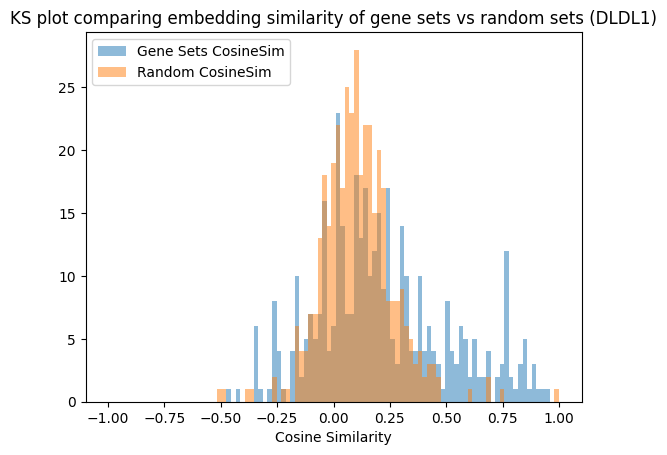

Computing distance matrix for embeddings..
Computing link prediction metrics for cutoff percentile=0%


Computing link prediction metrics for cutoff percentile=1%


Computing link prediction metrics for cutoff percentile=2%


Computing link prediction metrics for cutoff percentile=3%


Computing link prediction metrics for cutoff percentile=4%


Computing link prediction metrics for cutoff percentile=5%


Computing link prediction metrics for cutoff percentile=6%


Computing link prediction metrics for cutoff percentile=7%


Computing link prediction metrics for cutoff percentile=8%


Computing link prediction metrics for cutoff percentile=9%


Computing link prediction metrics for cutoff percentile=10%


Computing link prediction metrics for cutoff percentile=11%


Computing link prediction metrics for cutoff percentile=12%


Computing link prediction metrics for cutoff percentile=13%


Computing link prediction metrics for cutoff percentile=14%


Computing link prediction metrics for cutoff percentile=15%


Computing link prediction metrics for cutoff percentile=16%


Computing link prediction metrics for cutoff percentile=17%


Computing link prediction metrics for cutoff percentile=18%


Computing link prediction metrics for cutoff percentile=19%


Computing link prediction metrics for cutoff percentile=20%


Computing link prediction metrics for cutoff percentile=21%


Computing link prediction metrics for cutoff percentile=22%


Computing link prediction metrics for cutoff percentile=23%


Computing link prediction metrics for cutoff percentile=24%


Computing link prediction metrics for cutoff percentile=25%


Computing link prediction metrics for cutoff percentile=26%


Computing link prediction metrics for cutoff percentile=27%


Computing link prediction metrics for cutoff percentile=28%


Computing link prediction metrics for cutoff percentile=29%


Computing link prediction metrics for cutoff percentile=30%


Computing link prediction metrics for cutoff percentile=31%


Computing link prediction metrics for cutoff percentile=32%


Computing link prediction metrics for cutoff percentile=33%


Computing link prediction metrics for cutoff percentile=34%


Computing link prediction metrics for cutoff percentile=35%


Computing link prediction metrics for cutoff percentile=36%


Computing link prediction metrics for cutoff percentile=37%


Computing link prediction metrics for cutoff percentile=38%


Computing link prediction metrics for cutoff percentile=39%


Computing link prediction metrics for cutoff percentile=40%


Computing link prediction metrics for cutoff percentile=41%


Computing link prediction metrics for cutoff percentile=42%


Computing link prediction metrics for cutoff percentile=43%


Computing link prediction metrics for cutoff percentile=44%


Computing link prediction metrics for cutoff percentile=45%


Computing link prediction metrics for cutoff percentile=46%


Computing link prediction metrics for cutoff percentile=47%


Computing link prediction metrics for cutoff percentile=48%


Computing link prediction metrics for cutoff percentile=49%


Computing link prediction metrics for cutoff percentile=50%


Computing link prediction metrics for cutoff percentile=51%


Computing link prediction metrics for cutoff percentile=52%


Computing link prediction metrics for cutoff percentile=53%


Computing link prediction metrics for cutoff percentile=54%


Computing link prediction metrics for cutoff percentile=55%


Computing link prediction metrics for cutoff percentile=56%


Computing link prediction metrics for cutoff percentile=57%


Computing link prediction metrics for cutoff percentile=58%


Computing link prediction metrics for cutoff percentile=59%


Computing link prediction metrics for cutoff percentile=60%


Computing link prediction metrics for cutoff percentile=61%


Computing link prediction metrics for cutoff percentile=62%


Computing link prediction metrics for cutoff percentile=63%


Computing link prediction metrics for cutoff percentile=64%


Computing link prediction metrics for cutoff percentile=65%


Computing link prediction metrics for cutoff percentile=66%


Computing link prediction metrics for cutoff percentile=67%


Computing link prediction metrics for cutoff percentile=68%


Computing link prediction metrics for cutoff percentile=69%


Computing link prediction metrics for cutoff percentile=70%


Computing link prediction metrics for cutoff percentile=71%


Computing link prediction metrics for cutoff percentile=72%


Computing link prediction metrics for cutoff percentile=73%


Computing link prediction metrics for cutoff percentile=74%


Computing link prediction metrics for cutoff percentile=75%


Computing link prediction metrics for cutoff percentile=76%


Computing link prediction metrics for cutoff percentile=77%


Computing link prediction metrics for cutoff percentile=78%


Computing link prediction metrics for cutoff percentile=79%


Computing link prediction metrics for cutoff percentile=80%


Computing link prediction metrics for cutoff percentile=81%


Computing link prediction metrics for cutoff percentile=82%


Computing link prediction metrics for cutoff percentile=83%


Computing link prediction metrics for cutoff percentile=84%


Computing link prediction metrics for cutoff percentile=85%


Computing link prediction metrics for cutoff percentile=86%


Computing link prediction metrics for cutoff percentile=87%


Computing link prediction metrics for cutoff percentile=88%


Computing link prediction metrics for cutoff percentile=89%


Computing link prediction metrics for cutoff percentile=90%


Computing link prediction metrics for cutoff percentile=91%


Computing link prediction metrics for cutoff percentile=92%


Computing link prediction metrics for cutoff percentile=93%


Computing link prediction metrics for cutoff percentile=94%


Computing link prediction metrics for cutoff percentile=95%


Computing link prediction metrics for cutoff percentile=96%


Computing link prediction metrics for cutoff percentile=97%


Computing link prediction metrics for cutoff percentile=98%


Computing link prediction metrics for cutoff percentile=99%


Finished prediction sweep over percentiles.


In [13]:
# needs to be cached in embeddings_obj
report = mv.evaluate(perturbation_embeddings, gene_graph, gene_sets, percentile_range=[0, 100])

In [14]:
recalls = [report["metrics_by_percentile"][i]["recall"] for i in report["metrics_by_percentile"]]
precisions = [report["metrics_by_percentile"][i]["precision"] for i in report["metrics_by_percentile"]]
tprs = [report["metrics_by_percentile"][i]["TPR"] for i in report["metrics_by_percentile"]]
fprs = [report["metrics_by_percentile"][i]["FPR"] for i in report["metrics_by_percentile"]]

In [15]:
report["metrics_by_percentile"][95]

{'recall': 0.4278943805010156,
 'precision': 0.06270463339617026,
 'f1_score': 0.109380408445829,
 'TPR': 0.4278943805010156,
 'FPR': 0.09320796416520316}

In [16]:
report["metrics_by_percentile"][90]

{'recall': 0.5287745429925524,
 'precision': 0.038312484670100566,
 'f1_score': 0.07144817491537829,
 'TPR': 0.5287745429925524,
 'FPR': 0.1934210785958127}

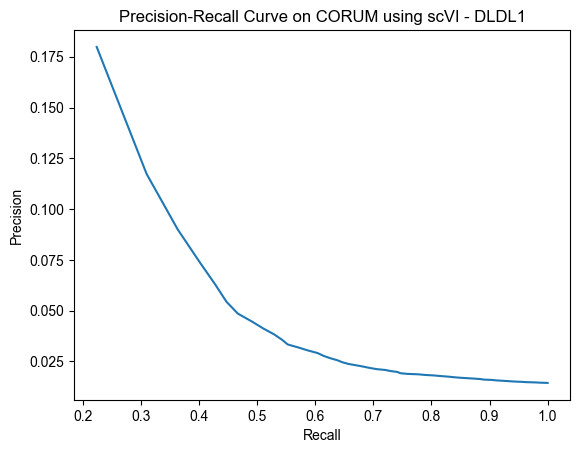

In [17]:
# put plots in a plotting module file
# plots should be generated from embeddings_obj or report
plt.plot(recalls, precisions)
sns.set_color_codes("pastel")
sns.set_theme()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve on CORUM using scVI - DLDL1")
plt.show()

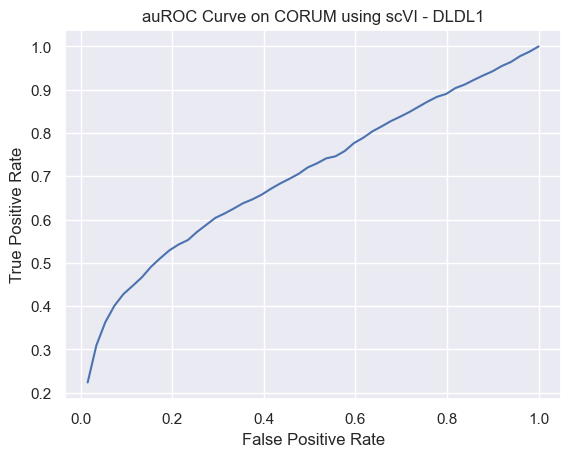

In [18]:
plt.plot(fprs, tprs)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("auROC Curve on CORUM using scVI - DLDL1")
plt.show()

## Update the annadata object and write out the output

In [19]:
if "multivariate_report" not in bdata.uns:
    bdata.uns["multivariate_report"]={}

In [20]:
if transcriptoprint==True:
    bdata.uns["multivariate_report"][key_uns]["transcriptoprint"] = {"roc_auc": report["roc_auc"], "auprc": report["auprc"], 
                                    "95percentile":report["metrics_by_percentile"][95], "90percentile":report["metrics_by_percentile"][90]}
else:
    bdata.uns["multivariate_report"][key_uns] = {"roc_auc": report["roc_auc"], "auprc": report["auprc"], 
                                    "95percentile":report["metrics_by_percentile"][95], "90percentile":report["metrics_by_percentile"][90]}

In [21]:
adata.uns = bdata.uns.copy()

In [22]:
adata.write_h5ad(MV_file)

In [23]:
adata.uns['multivariate_report'][key_uns]

{'roc_auc': 0.699708689770434,
 'auprc': 0.038053632142551426,
 '95percentile': {'recall': 0.4278943805010156,
  'precision': 0.06270463339617026,
  'f1_score': 0.109380408445829,
  'TPR': 0.4278943805010156,
  'FPR': 0.09320796416520316},
 '90percentile': {'recall': 0.5287745429925524,
  'precision': 0.038312484670100566,
  'f1_score': 0.07144817491537829,
  'TPR': 0.5287745429925524,
  'FPR': 0.1934210785958127}}

## Data Tabulation

In [24]:
metrics = pd.DataFrame.from_dict(report["metrics_by_percentile"],orient='index')

In [25]:
metrics["percentile"] = metrics.index

In [26]:
metrics[metrics.percentile>89]

,recall,precision,f1_score,TPR,FPR,percentile
90,0.528775,0.038312,0.071448,0.528775,0.193421,90
91,0.510494,0.041146,0.076154,0.510494,0.173363,91
92,0.490860,0.044580,0.081736,0.490860,0.153304,92
93,0.466486,0.048511,0.087883,0.466486,0.133335,93
94,0.446852,0.054361,0.096931,0.446852,0.113276,94
95,0.427894,0.062705,0.109380,0.427894,0.093208,95
96,0.400812,0.073825,0.124684,0.400812,0.073278,96
97,0.362898,0.089978,0.144202,0.362898,0.053486,97
98,0.309411,0.117270,0.170078,0.309411,0.033940,98
99,0.223426,0.179837,0.199275,0.223426,0.014849,99


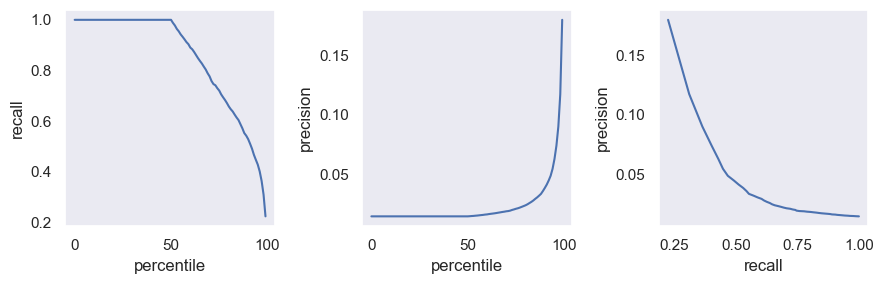

In [27]:
_, axs = plt.subplots(1, 3, figsize=np.array([3, 1]) * 3)
xy = [("percentile", "recall"), ("percentile", "precision"), ("recall", "precision")]
for (x, y), ax in zip(xy, axs.flat):
    ax.plot(metrics[x], metrics[y])
    ax.grid()
    ax.set_xlabel(x)
    ax.set_ylabel(y)
plt.tight_layout()